In [80]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.api.types import is_numeric_dtype
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from imblearn.over_sampling import SMOTE
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score, recall_score, precision_score, roc_auc_score, auc, roc_curve

In [81]:
# Loads the Telco Customer Churn dataset from a CSV file into a pandas DataFrame.
df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [82]:
# Displays the first five rows of the DataFrame to preview the dataset.
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [83]:
# Provides a concise summary of the DataFrame including column names, data types, and non-null counts.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [84]:
# Checks for missing values in each column and returns the total count of null values per column.
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [85]:
# Identifies duplicate rows in the DataFrame and returns the total number of duplicated records.
df.duplicated().sum()

np.int64(0)

Visualization

In [86]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

C:\Users\MD Maruf\AppData\Local\Temp\ipykernel_32396\3737425929.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(                             # Plots the count of each category in the 'Churn' column.


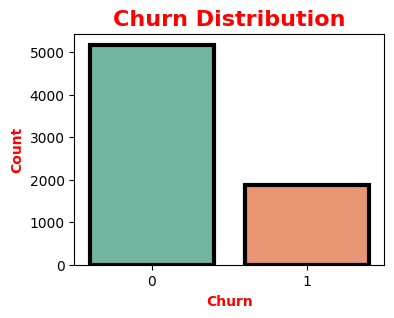

In [232]:
# Creates a count plot for the 'Churn' column with a title to visualize the distribution of churned vs non-churned customers.
plt.figure(figsize=(4,3))                  # Sets the figure size for the plot.
sns.countplot(                             # Plots the count of each category in the 'Churn' column.
    x='Churn', 
    data=df, 
    palette='Set2', 
    edgecolor= 'black',
    linewidth= 3,
)          
plt.title("Churn Distribution", fontsize=16, color='red', fontweight='bold') # Adds a title to the plot.
plt.xlabel('Churn', color='red', fontweight='bold')
plt.ylabel('Count', color='red', fontweight='bold')
plt.show()                                 # Displays the count plot.

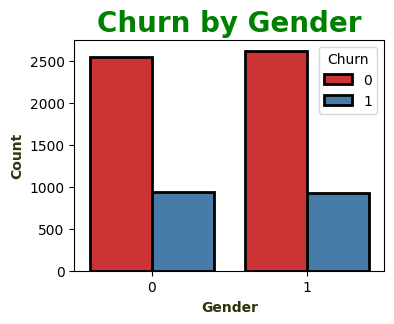

In [237]:
# Creates a count plot to visualize customer churn distribution across genders with separate bars for churn status.
plt.figure(figsize=(4,3))                  # Sets the figure size for the plot.
sns.countplot(                             # Plots counts of 'gender' split by 'Churn' categories.
    x='gender', 
    hue='Churn',
    palette='Set1',
    data=df,
    edgecolor='black',
    linewidth=2
) 
plt.title("Churn by Gender", fontsize=20, fontweight='bold', color='green')# Adds a title to the plot.
plt.xlabel('Gender', color="#2B3509", fontweight='bold')
plt.ylabel('Count', color="#2D360D", fontweight='bold')
plt.show()                                 # Displays the count plot.

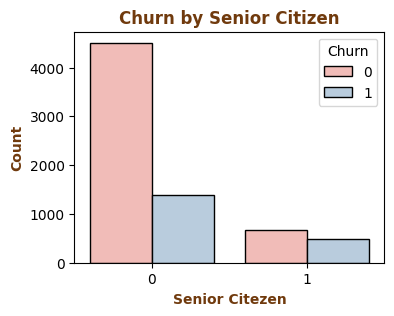

In [239]:
# Creates a count plot to visualize customer churn distribution based on whether they are senior citizens.
plt.figure(figsize=(4,3))                        # Sets the figure size for the plot.
sns.countplot(                                   # Plots counts of 'SeniorCitizen' split by 'Churn' categories.
    x='SeniorCitizen', 
    hue='Churn', 
    data=df,
    palette='Pastel1',
    edgecolor='black'
)  
plt.title("Churn by Senior Citizen", color='#703A0D', fontweight='bold')# Adds a title to the plot.
plt.xlabel('Senior Citezen', color="#703A0D", fontweight='bold')
plt.ylabel('Count', color="#703A0D", fontweight='bold')
plt.show()                                      # Displays the count plot.

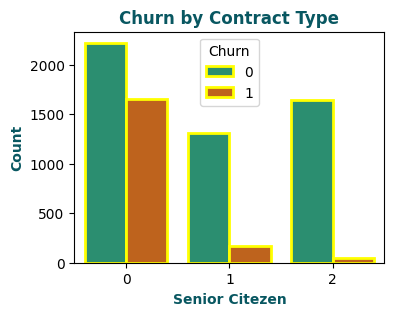

In [240]:
# Creates a count plot to visualize customer churn distribution across different contract types.
plt.figure(figsize=(4,3))                  # Sets the figure size for the plot.
sns.countplot(                             # Plots counts of 'Contract' types split by 'Churn' categories.
    x='Contract', 
    hue='Churn', 
    data=df,
    palette='Dark2',
    edgecolor='yellow',
    linewidth=2

) 
plt.title("Churn by Contract Type", fontweight='bold', color='#085761')# Adds a title to the plot.
plt.xlabel('Senior Citezen', color="#085761", fontweight='bold')
plt.ylabel('Count', color="#085761", fontweight='bold')
plt.show()                                # Displays the count plot.

C:\Users\MD Maruf\AppData\Local\Temp\ipykernel_32396\993042968.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(                               # Plots a boxplot of 'tenure' grouped by 'Churn' categories.


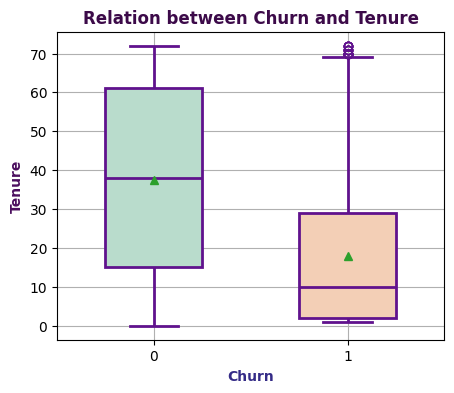

In [243]:
# Creates a boxplot to visualize the distribution of customer tenure for each churn category.
plt.figure(figsize=(5,4))                  # Sets the figure size for the plot.
sns.boxplot(                               # Plots a boxplot of 'tenure' grouped by 'Churn' categories. 
    x='Churn', 
    y='tenure', 
    data=df,
    palette='Pastel2',
    linewidth=2,
    linecolor= "#60128D",
    width=0.5,
    showmeans=True
)  
plt.title("Relation between Churn and Tenure", fontweight='bold', color="#3C0A49")
plt.xlabel('Churn', color="#1E147AE6", fontweight='bold')
plt.ylabel('Tenure', color="#4B0E5E", fontweight='bold')
plt.grid(True)
plt.show()                                 # Displays the boxplot.

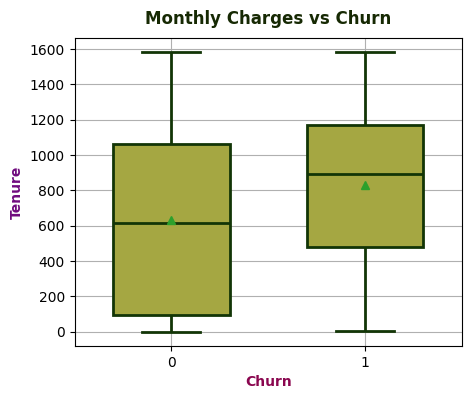

In [247]:
# Creates a boxplot to visualize the distribution of monthly charges for each churn category with a title.
plt.figure(figsize=(5,4))                  # Sets the figure size for the plot.
sns.boxplot(                               # Plots a boxplot of 'MonthlyCharges' grouped by 'Churn'.                 
    x='Churn',
    y='MonthlyCharges', 
    data=df,
    color="#B5B831",
    linewidth=2,
    linecolor="#123506",
    width=0.6,
    showmeans=True
)  
plt.title("Monthly Charges vs Churn", color="#162903", fontweight='bold', pad=10)# Adds a title to the plot.
plt.xlabel('Churn', color="#8A064FFF", fontweight='bold')
plt.ylabel('Tenure', color="#700B7E", fontweight='bold')
plt.grid(True)
plt.show()                                          # Displays the boxplot.

In [93]:
# Converts the 'TotalCharges' column to numeric values, coercing errors to NaN.
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Checks how many missing values (NaN) exist in the 'TotalCharges' column.
df['TotalCharges'].isnull().sum()

# Fills the missing values in 'TotalCharges' with the median value of the column.
df['TotalCharges'] = df['TotalCharges'].fillna(df['TotalCharges'].median())

In [94]:
# Drops the 'customerID' column from the DataFrame as it is not useful for modeling.
df = df.drop(['customerID'], axis=1)

In [95]:
# Encodes all columns in the DataFrame into numeric values using Label Encoding (converts categorical/string data to numbers).
le = LabelEncoder()                  # Creates a LabelEncoder object.

for col in df.columns:
    df[col] = le.fit_transform(df[col])  # Transforms each column into numeric codes.

In [96]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,142,74,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,498,3625,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,436,536,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,266,3571,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,729,674,1


In [97]:
# Separates the features (independent variables) and target (dependent variable) for modeling.
x = df.drop(['Churn'], axis=1)   # Selects all columns except 'Churn' as features.
y = df[['Churn']]                # Selects 'Churn' column as the target variable.

In [98]:
# Splits the dataset into training and testing sets for model evaluation.
xtrain, xtest, ytrain, ytest = train_test_split(
    x, y, test_size=0.2, random_state=42
)  # 80% of data for training, 20% for testing; random_state ensures reproducibility.

In [99]:
# Displays the first five rows of the training feature set to preview the data.
xtrain.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
2142,0,0,0,1,21,1,0,0,2,0,2,0,0,2,1,0,3,625,2972
1623,0,0,0,0,54,1,2,1,0,2,0,0,2,2,2,1,0,1230,5459
6074,1,0,1,0,1,0,1,0,0,0,0,0,0,0,0,1,2,62,45
1362,1,0,0,0,4,1,0,1,0,0,0,0,0,0,0,1,2,719,966
6754,1,0,0,1,0,1,2,0,2,2,0,2,0,0,2,1,0,579,3065


In [100]:
# Displays the first five rows of the training target variable to preview the labels.
ytrain.head()

,Churn
2142,0
1623,0
6074,1
1362,1
6754,0


In [101]:
# Returns the shape of the training feature set and training target set (rows, columns).
xtrain.shape, ytrain.shape

((5634, 19), (5634, 1))

In [102]:
# Counts the number of samples in each class of the training target variable.
ytrain.value_counts()

Churn
0        4138
1        1496
Name: count, dtype: int64

In [103]:
# Creates an SMOTE object with a fixed random state for reproducibility.
smote = SMOTE(random_state=42)

# Applies SMOTE to resample the training feature set and target variable to balance class distribution.
xtrain_res, ytrain_res = smote.fit_resample(xtrain, ytrain)

# Returns the shape of the resampled training target variable after SMOTE.
ytrain_res.shape

(8276, 1)

# The Decision Tree Classifier model is developed with resampling.

In [104]:
# Initializes a Decision Tree classifier with controlled depth and minimum sample constraints to prevent overfitting.
dt = DecisionTreeClassifier(max_depth=3)

# Trains (fits) the Decision Tree model using the resampled training data.
model1 = dt.fit(xtrain_res, ytrain_res)

In [105]:
# Calculates and returns the accuracy of the trained model on the resampled training dataset.
model1.score(xtrain_res, ytrain_res)

0.7659497341710971

In [106]:
# Calculates and returns the accuracy of the trained model on the untouched test dataset.
model1.score(xtest, ytest)

0.7146912704045423

In [107]:
# Uses the trained Decision Tree model to predict the target variable for the test feature set.
pred_y = model1.predict(xtest)

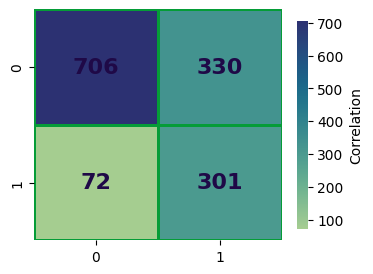

In [271]:
# Plots the confusion matrix as a heatmap for better visualization of model performance.
cm = confusion_matrix(ytest, pred_y)     # Computes confusion matrix comparing actual vs predicted labels.
plt.figure(figsize=(4,3))                # Sets the figure size for the heatmap.
sns.heatmap(
    cm, 
    annot=True, 
    fmt='g',
    cmap='crest',
    linewidths=2,
    linecolor="#059C37",
    annot_kws={
        'color':"#1F0947",
        'fontweight': 'bold',
        'fontsize':16
    },
    cbar=True,
    cbar_kws={
        'shrink':0.9,
        'label':'Correlation',
    }
)                            # Plots the confusion matrix with numeric annotations.     
plt.show()                               # Displays the heatmap.

In [109]:
# Generates a detailed classification report showing precision, recall, F1-score, and support for each class.
cl = classification_report(ytest, pred_y)  # Computes classification metrics.
print(cl)                                   # Displays the classification report.

              precision    recall  f1-score   support

           0       0.91      0.68      0.78      1036
           1       0.48      0.81      0.60       373

    accuracy                           0.71      1409
   macro avg       0.69      0.74      0.69      1409
weighted avg       0.79      0.71      0.73      1409



In [110]:
# Calculates the accuracy of the model on the test dataset.
acc = accuracy_score(ytest, pred_y)  # Computes the proportion of correctly predicted samples.
acc                                   # Displays the accuracy score.

0.7146912704045423

In [111]:
# Calculates the F1-score of the model on the test dataset, which balances precision and recall.
f1 = f1_score(ytest, pred_y)  # Computes the harmonic mean of precision and recall.
f1                             # Displays the F1-score.

0.599601593625498

In [112]:
# Calculates the ROC-AUC score to evaluate the model's ability to distinguish between classes.
roc_auc = roc_auc_score(ytest, pred_y)  # Computes the area under the ROC curve.
roc_auc                                  # Displays the ROC-AUC score.

0.7442188454252797

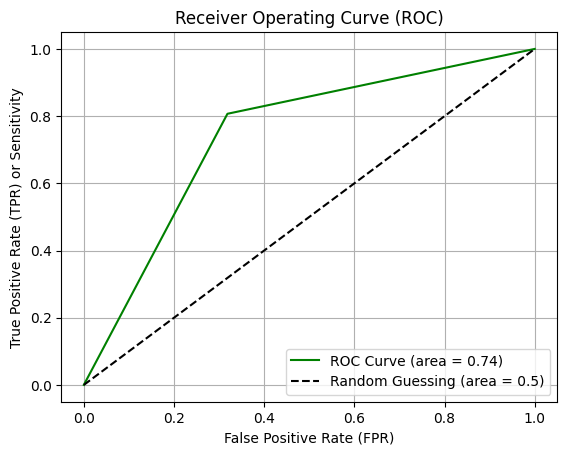

In [275]:
# Plots the Receiver Operating Characteristic (ROC) curve to visualize the trade-off between true positive rate and false positive rate.
fpr, tpr, thresholds = roc_curve(ytest, pred_y)  # Computes false positive rate, true positive rate, and thresholds.
ruc_auc = auc(fpr, tpr)                          # Calculates the area under the ROC curve (AUC).

plt.plot(fpr, tpr, color='green', label=f'ROC Curve (area = {ruc_auc:.2f})')  # Plots the ROC curve.
plt.plot([0,1], [0,1], color='black', linestyle='--', label='Random Guessing (area = 0.5)')  # Reference line for random model.
plt.xlabel("False Positive Rate (FPR)")         # Labels the x-axis.
plt.ylabel("True Positive Rate (TPR) or Sensitivity")  # Labels the y-axis.
plt.title("Receiver Operating Curve (ROC)")     # Adds a title to the plot.
plt.legend(loc='lower right')                    # Displays the legend in the lower-right corner.
plt.grid(True)                                  # Adds a grid to the plot.
plt.show()                                      # Displays the ROC curve.

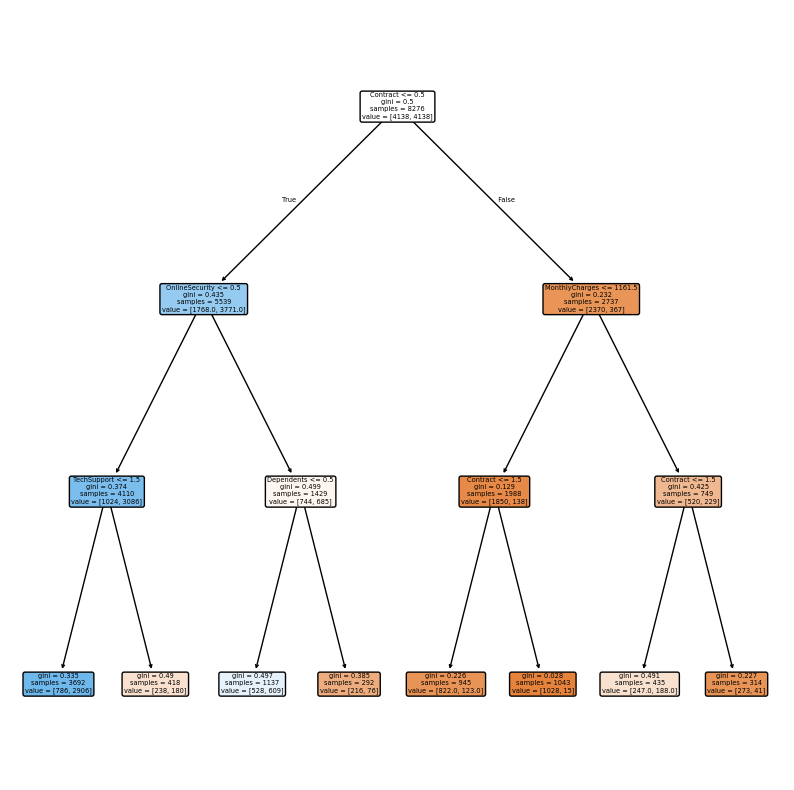

In [114]:
# Visualizes the trained Decision Tree model as a tree diagram.
plt.figure(figsize=(10,10))                                # Sets the figure size for the tree plot.
plot_tree(model1, feature_names=x.columns, filled=True, rounded=True)  # Plots the Decision Tree with feature names, colored nodes, and rounded edges.
plt.show()                                                  # Displays the Decision Tree plot.

# End of model 1

# The Decision Tree Classifier model was developed without resampling

In [115]:
# Trains a Decision Tree model using the original (imbalanced) training data without SMOTE.
model2 = dt.fit(xtrain, ytrain)

In [116]:
# Calculates the accuracy of the Decision Tree model trained on the original training data.
model2.score(xtrain, ytrain)

0.7827476038338658

In [117]:
# Calculates the accuracy of the Decision Tree model trained on the original data when tested on the test dataset.
model2.score(xtest, ytest)

0.7814052519517388

In [118]:
# Uses the Decision Tree model trained on the original data to predict labels for the test set.
pred_y2 = model2.predict(xtest)

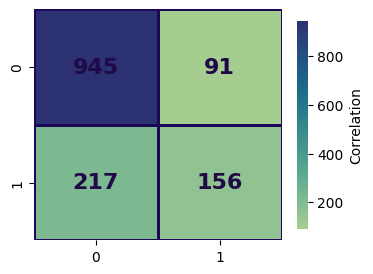

In [277]:
# Computes and visualizes the confusion matrix for the predictions made by the model trained on original (imbalanced) data.
cm2 = confusion_matrix(ytest, pred_y2)     # Calculates confusion matrix comparing actual vs predicted labels.
plt.figure(figsize=(4,3))                 # Sets the figure size for the heatmap.
sns.heatmap(
    cm2, 
    annot=True, 
    fmt='g',
    cmap='crest',
    linewidths=2,
    linecolor="#1F0757",
    annot_kws={
        'color':"#1F0947",
        'fontweight': 'bold',
        'fontsize':16
    },
    cbar=True,
    cbar_kws={
        'shrink':0.9,
        'label':'Correlation',
    }
)            # Plots the confusion matrix with numeric annotations.
plt.show()                                # Displays the heatmap.

In [120]:
# Generates a classification report for the model trained on original (imbalanced) data.
cl2 = classification_report(ytest, pred_y2)  # Computes precision, recall, F1-score, and support for each class.
print(cl2)                                    # Displays the classification report.

              precision    recall  f1-score   support

           0       0.81      0.91      0.86      1036
           1       0.63      0.42      0.50       373

    accuracy                           0.78      1409
   macro avg       0.72      0.67      0.68      1409
weighted avg       0.77      0.78      0.77      1409



In [121]:
# Calculates the accuracy of the Decision Tree model trained on original (imbalanced) data.
acc2 = accuracy_score(ytest, pred_y2)  # Computes the proportion of correctly predicted samples.
acc2                                     # Displays the accuracy score.

0.7814052519517388

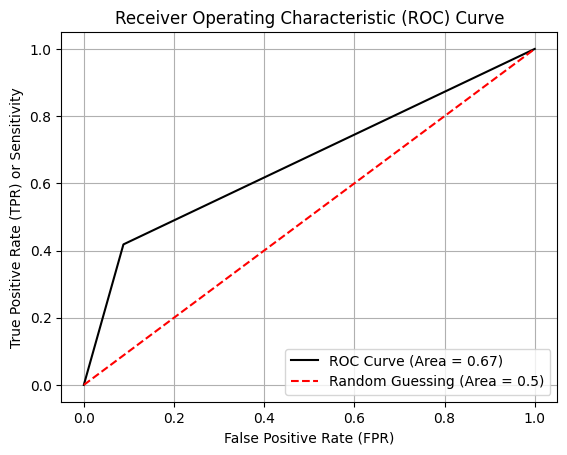

In [122]:
# Plots the ROC curve for the Decision Tree model trained on original (imbalanced) data.
fpr, tpr, thresholds = roc_curve(ytest, pred_y2)  # Computes false positive rate, true positive rate, and thresholds.
roc_auc = auc(fpr, tpr)                           # Calculates the area under the ROC curve (AUC).

plt.plot(fpr, tpr, color='black', label=f'ROC Curve (Area = {roc_auc:.2f})')  # Plots the ROC curve.
plt.plot([0,1], [0,1], color='red', linestyle='--', label='Random Guessing (Area = 0.5)')  # Reference line for random classifier.
plt.xlabel('False Positive Rate (FPR)')           # Labels the x-axis.
plt.ylabel('True Positive Rate (TPR) or Sensitivity')  # Labels the y-axis.
plt.title('Receiver Operating Characteristic (ROC) Curve')  # Adds a title to the plot.
plt.legend(loc='lower right')                      # Displays the legend in the lower-right corner.
plt.grid(True)                                     # Adds grid lines to the plot.
plt.show()                                        # Displays the ROC curve.

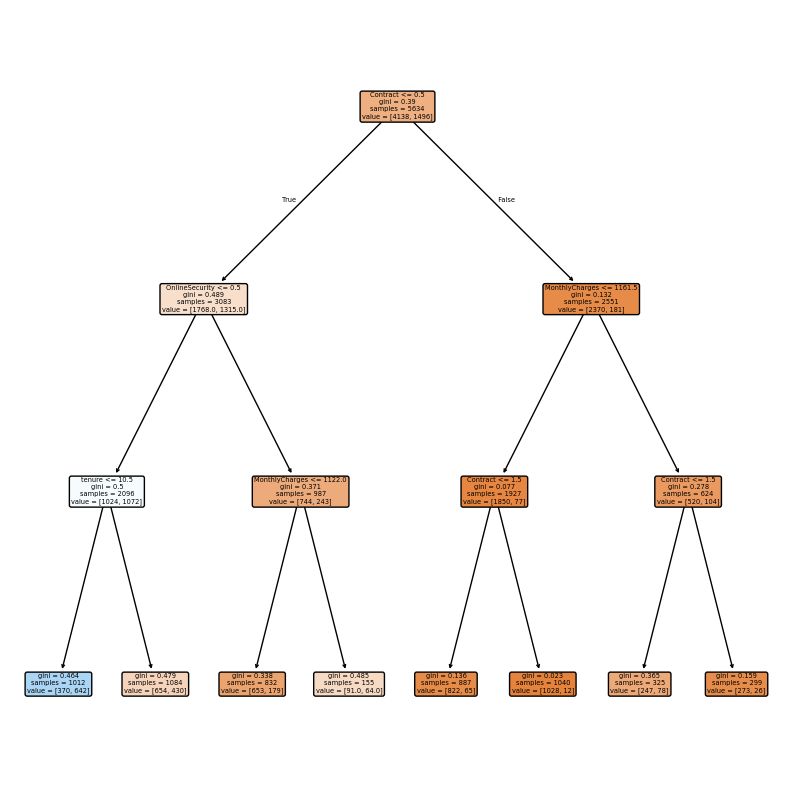

In [123]:
# Visualizes the trained Decision Tree model as a tree diagram.
plt.figure(figsize=(10,10))                                # Sets the figure size for the tree plot.
plot_tree(model2, feature_names=x.columns, filled=True, rounded=True)  # Plots the Decision Tree with feature names, colored nodes, and rounded edges.
plt.show()  

# End Of model 2

# The Decision Tree Classifier model is developed with Parameter Optimization

In [124]:
# Parameter grid for tuning a Decision Tree Classifier using GridSearchCV
parameters = {
    # Criterion defines the function to measure the quality of a split (Gini impurity or Information Gain)
    'criterion': ['gini', 'entropy'],
    
    # max_depth controls the maximum depth of the decision tree to prevent overfitting
    'max_depth': [None, 3, 5, 7, 10],
    
    # min_samples_split specifies the minimum number of samples required to split an internal node
    'min_samples_split': [2, 5, 10, 10],
    
    # min_samples_leaf sets the minimum number of samples that must be present in a leaf node
    'min_samples_leaf': [1, 2, 5, 10],
    
    # splitter determines the strategy used to choose the split at each node
    'splitter': ['best', 'random'],
    
    # ccp_alpha is the complexity parameter used for cost-complexity pruning
    'ccp_alpha': [0.0, 0.001, 0.01, 0.1]
}


In [125]:
# GridSearchCV is used to find the best combination of hyperparameters for the model
gridscv = GridSearchCV(
    
    # estimator specifies the machine learning model to be optimized
    estimator=dt,
    
    # param_grid contains the set of parameters to try during grid search
    param_grid=parameters,
    
    # cv defines the number of cross-validation folds
    cv=5,
    
    # scoring specifies the metric used to evaluate model performance
    scoring='accuracy',
    
    # n_jobs = -1 means using all available CPU cores for faster computation
    n_jobs=-1,
    
    # verbose controls the level of detailed output during training
    verbose=2
)

In [126]:
gridscv

,estimator,DecisionTreeC...r(max_depth=3)
,param_grid,"{'ccp_alpha': [0.0, 0.001, ...], 'criterion': ['gini', 'entropy'], 'max_depth': [None, 3, ...], 'min_samples_leaf': [1, 2, ...], ...}"
,scoring,'accuracy'
,n_jobs,-1
,refit,True
,cv,5
,verbose,2
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,criterion,'gini'


In [127]:
# Fits GridSearchCV on the training data to find the best model and parameters
model3 = gridscv.fit(xtrain, ytrain)

Fitting 5 folds for each of 1280 candidates, totalling 6400 fits


In [128]:
# Returns the accuracy score of the best model on the training data
model3.score(xtrain, ytrain)

0.7887823926162584

In [129]:
# Returns the accuracy score of the fitted GridSearchCV model on the test dataset
model3.score(xtest, ytest)

0.8026969481902059

In [130]:
# Predicts the target values for the test dataset using the fitted GridSearchCV model
pred_y3 = model3.predict(xtest)

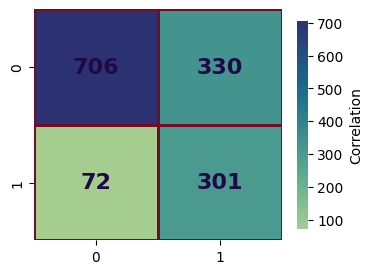

In [278]:
# Computes the confusion matrix for test data and predicted values, then visualizes it using a heatmap
cm3 = confusion_matrix(ytest, pred_y3)
plt.figure(figsize=(4,3))
sns.heatmap(
    cm, 
    annot=True, 
    fmt='g',
    cmap='crest',
    linewidths=2,
    linecolor="#750C26",
    annot_kws={
        'color':"#1F0947",
        'fontweight': 'bold',
        'fontsize':16
    },
    cbar=True,
    cbar_kws={
        'shrink':0.9,
        'label':'Correlation',
    }
)        
plt.show()

In [132]:
# Retrieves the best trained model found by GridSearchCV
best_model = model3.best_estimator_

# Retrieves the best parameter combination found during grid search
best_param = model3.best_params_

# Retrieves the best cross-validated score achieved by the best model
best_score = model3.best_score_

# Retrieves the index (position) of the best parameter combination in cv_results_
best_index = model3.best_index_

In [133]:
# Prints the best trained model found by GridSearchCV
print("Best Model: ", best_model)

# Prints the best parameter combination found during grid search
print("Best Parameter: ", best_param)

# Prints the best cross-validated score achieved by the best model
print("Best Score: ", best_score)

# Prints the index of the best parameter combination in cv_results_
print("Best Index: ", best_index)

Best Model:  DecisionTreeClassifier(ccp_alpha=0.001, criterion='entropy', max_depth=5,
                       min_samples_leaf=10, min_samples_split=5,
                       splitter='random')
Best Parameter:  {'ccp_alpha': 0.001, 'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 10, 'min_samples_split': 5, 'splitter': 'random'}
Best Score:  0.7941071802881319
Best Index:  571


In [134]:
# Predicts the probability of the positive class for the test dataset using the best trained model
pred_y_proba = best_model.predict_proba(xtest)[:, 1]

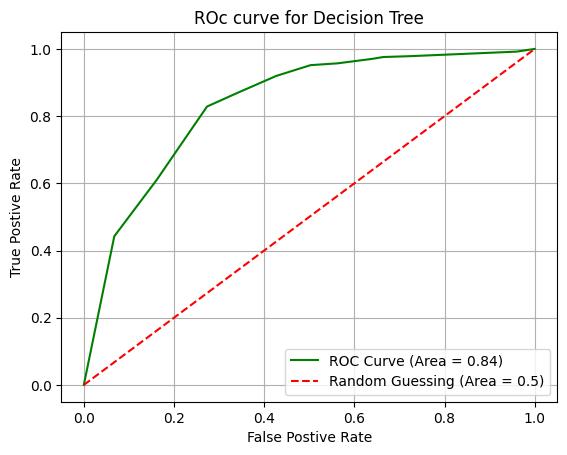

In [135]:
# Computes the false positive rate, true positive rate, and thresholds for ROC curve
fpr, tpr, thresholds = roc_curve(ytest, pred_y_proba)

# Computes the Area Under the ROC Curve (AUC) score
roc_auc = roc_auc_score(ytest, pred_y_proba)

# Plots the ROC curve for the Decision Tree model
plt.plot(fpr, tpr, color='green', label=f'ROC Curve (Area = {roc_auc:.2f})')

# Plots the reference line for random guessing
plt.plot([0,1], [0,1], color='red', linestyle='--', label='Random Guessing (Area = 0.5)')

# Labels for X and Y axes
plt.xlabel("False Postive Rate")
plt.ylabel("True Postive Rate")

# Title of the plot
plt.title("ROc curve for Decision Tree")

# Display legend at lower right
plt.legend(loc='lower right')

# Adds grid to the plot
plt.grid(True)

# Displays the plot
plt.show()

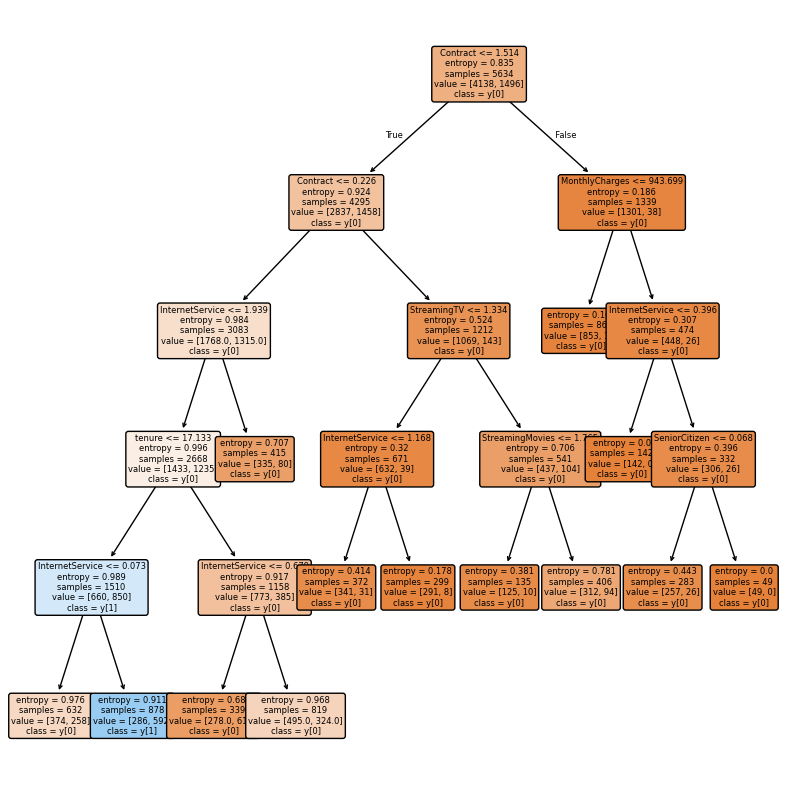

In [136]:
# Sets the figure size for the decision tree plot
plt.figure(figsize=(10,10))

# Plots the trained decision tree with feature names, class names, rounded nodes, filled colors, and small font size
plot_tree(
    best_model, 
    feature_names=xtrain.columns, 
    class_names=True,
    rounded=True,
    filled=True,
    fontsize=6
)

# Displays the plot
plt.show()

# 3 Model Comparison

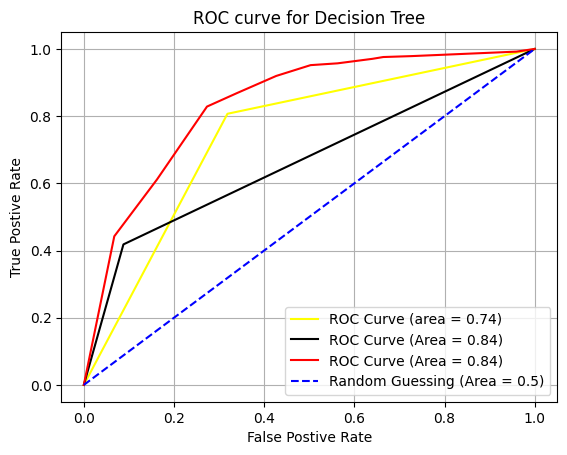

In [142]:
# Computes ROC curve (FPR, TPR, thresholds) for three different prediction sets
fpr1, tpr1, thresholds = roc_curve(ytest, pred_y) 
fpr2, tpr2, thresholds = roc_curve(ytest, pred_y2)   
fpr3, tpr3, thresholds = roc_curve(ytest, pred_y_proba)

# Computes AUC scores for the first two prediction sets and ROC AUC for the probability predictions
ruc_auc = auc(fpr1, tpr1) 
roc_auc = auc(fpr2, tpr2)  
roc_auc = roc_auc_score(ytest, pred_y_proba)

# Plots ROC curve for the first prediction set
plt.plot(fpr1, tpr1, color='yellow', label=f'ROC Curve (area = {ruc_auc:.2f})') 

# Plots ROC curve for the second prediction set
plt.plot(fpr2, tpr2, color='black', label=f'ROC Curve (Area = {roc_auc:.2f})')

# Plots ROC curve for the third prediction set (probabilities)
plt.plot(fpr3, tpr3, color='red', label=f'ROC Curve (Area = {roc_auc:.2f})')

# Plots reference line for random guessing
plt.plot([0,1], [0,1], color='blue', linestyle='--', label='Random Guessing (Area = 0.5)')

# Labels for X and Y axes
plt.xlabel("False Postive Rate")
plt.ylabel("True Postive Rate")

# Title of the plot
plt.title("ROC curve for Decision Tree")

# Display legend at lower right
plt.legend(loc='lower right')

# Adds grid to the plot
plt.grid(True)

# Displays the plot
plt.show()